# CMPE482 - Spring 2021 - Assignment 1
**Student ID**: 2017402069 \
**Name**: Nilüfer Çetin \
**Date**: 03.04.2021

The following six questions are part of the Assignment 1 of CMPE482 course. It should be noted that these problems might have various solutions and the guidelines provided by the student might not be the most effective or quickest solutions to exist. 

First, the packages that can be useful or necessary for the solutions are imported.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative
import scipy.linalg

# Question 1

Implement the **Gram-Schmidt** algorithm. Generate a ${5x5}$ matrix called ${X}$, where each element is drawn from the **unit Gaussian distribution**. Use your Gram-Schmidt algorithm to obtain the decomposition where ${X = QR}$ has ${Q}$ orthonormal columns
and ${R}$ is upper triangular. Print out the following quantities to show that your algorithm works as intended:

To implement the **Gram-Schmidt** algorithm along with **${QR}$-decomposition**, two functions from [IALA Python Companion of Stephen Boyd and Lieven Vandenberghe](https://ses.library.usyd.edu.au/bitstream/handle/2123/21370/vmls-python-companion.pdf?sequence=3&isAllowed=y) will be used.

In [9]:
##Gram-Schmidt Algorithm from the credited text book's Python Companion
def gramschmidt(a):
    q = []                                              ##forming the orthonormal matrix (basis)
    for i in range(len(a)):                             ##orthogonalization of row vectors
        q_tilde = a[i]
        for j in range(len(q)):
            q_tilde = q_tilde - (q[j] @ a[i])*q[j]      ##subtracting the already existing dimensions from the vector at hand
        if np.sqrt(sum(q_tilde**2)) <= 1e-10:           ##testing if the vector is linearly independent/adding a new dimension
            return q
        else:                                           ##normalization of the new vector by dividing to norm
            q_tilde = q_tilde / np.sqrt(sum(q_tilde**2))
            q.append(q_tilde)
    return q                                            ##note that this is actually the transpose/inverse of the actual basis

##Q-R decomposition from the credited text book's Python Companion
def QR_fact(A):
    Qtranspose = np.array(gramschmidt(A.T))             ##Inverse of an orthonormal matrix is its transpose
    R = Qtranspose @ A                                  ##A = Q.R -> Q-1.A = I.R -> Q(T).A = R
    Q = Qtranspose.T
    return Q, R

##Constructing the desired matrix
X = np.random.normal(0, 1, (5,5))
X

array([[-0.10039398, -0.60030955, -0.35987249, -0.07283325,  0.17094405],
       [-1.38649059, -1.34082798,  0.92313506,  1.12255285, -0.54123611],
       [ 0.24396666,  0.4600978 ,  0.30614568,  0.2019809 ,  0.80483663],
       [ 0.6386225 ,  1.70595639,  2.05991145, -1.06265921,  0.38993445],
       [-0.95647299, -0.29511818, -1.29787959, -1.39783162, -0.5143155 ]])

# Q1 - Part (a)

Find ${Q^TQ}$.

Transpose of an ${n x n}$ orthonormal matrix is the inverse of it also. Inner products of two **different** columns will be ${0}$ because of orthogonality and inner products of a **column vector with itself** will be ${1}$ because of the normalization procedure. Hence,

${Q^TQ = Q^{-1}Q = I}$

In [10]:
X_ortho, X_upper = QR_fact(X)
np.round(((X_ortho).T)@X_ortho, 6)

array([[ 1., -0., -0., -0., -0.],
       [-0.,  1.,  0., -0.,  0.],
       [-0.,  0.,  1.,  0.,  0.],
       [-0., -0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  0.,  1.]])

# Q1 - Part (b)

Find ${QQ^T}$.

${Q}$ is a ${n x n}$ matrix and its rows and columns are linearly independent being orthonormal. Hence, both left and right inverses **exist** and are **equal**, which is ${Q^T = Q^{-1}}$. Consequently,

${QQ^T = QQ^{-1} = I}$

In [11]:
np.round((X_ortho)@(X_ortho).T, 6)

array([[ 1., -0., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  0.,  1.]])

# Q1 - Part (c)

Find ${R}$.

For the matrix ${R}$, the element on ${i^{th}}$ row of ${j^{th}}$ column ${R_{i, j}}$ is the component of ${j^{th}}$ column vector of the matrix ${X}$ in the direction of ${i^{th}}$ column vector of the matrix ${Q}$. Because the Gram-Schmidt makes vectors linearly independent one by one in the sequence they have in the original matrix ${X}$, ${R_{i, j}}$ where ${j < i}$ are bound to be ${0}$. Hence, ${R}$ is **upper triangular**.   

In [12]:
np.round(X_upper, 6)

array([[ 1.820614,  1.869313,  0.762267, -0.46219 ,  0.917581],
       [-0.      ,  1.368552,  1.162805, -1.391868,  0.069518],
       [-0.      ,  0.      ,  2.25166 ,  1.208145,  0.166863],
       [-0.      , -0.      ,  0.      ,  0.882538,  0.188508],
       [-0.      ,  0.      ,  0.      , -0.      ,  0.690162]])

# Q1 - Part (d)

Find ${QR - X}$.

By definition the **${QR-}$decomposition** expresses the matrix ${X}$ as the matrix multiplication of an orhtonormal matrix and an upper triangular matrix, if the columns of ${X}$ are linearly independent.

${X = QR}$ implies ${X - QR = X - X = 0_{5 x 5}}$ 

In [13]:
np.round(X_ortho@X_upper - X, 6)

array([[ 0.,  0.,  0., -0., -0.],
       [-0.,  0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  0., -0.],
       [-0., -0.,  0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.]])

# Question 2

Consider the matrix ${\begin{bmatrix} 1 & -4 \\ 2 & 1 \end{bmatrix}}$. Draw the columns of this matrix as two vectors in ${\mathbb{R}^2}$. Then compute the ${QR}$-decomposition of this matrix using the algorithm you developed in Q1 and plot the columns of the resulting ${Q}$ matrix in ${\mathbb{R}^2}$.

# Q2 - Part (a)

Draw the columns of the matrix.

Text(-4.9, 0, 'second vector')

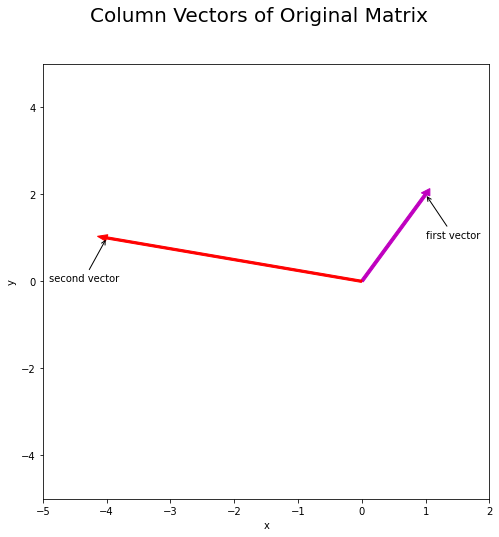

In [5]:
mtr = np.array([[1, -4], [2, 1]])    ##constructing matrix
mtr_col1 = mtr[:,0]           ##choosing columns
mtr_col2 = mtr[:,1]

fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Column Vectors of Original Matrix", size=20)
ax.arrow(0, 0, *mtr_col1, width=0.05, head_width=0.15, head_length=0.15, color='m')
ax.arrow(0, 0, *mtr_col2, width=0.05, head_width=0.15, head_length=0.15, color='r')
ax.set_xlim(-5,2)
ax.set_ylim(-5,5)
ax.set(ylabel='y', xlabel='x')
ax.annotate("first vector", xy=(1, 2), xytext=(1, 1), arrowprops=dict(arrowstyle="->"))
ax.annotate("second vector", xy=(-4, 1), xytext=(-4.9, 0), arrowprops=dict(arrowstyle="->"))

# Q2 - Part (b)

Draw the columns of ${Q}$ matrix

In [17]:
mtr_ortho, mtr_upper = QR_fact(mtr)
mtr_ortho

array([[ 0.4472136 , -0.89442719],
       [ 0.89442719,  0.4472136 ]])

Text(-0.9, -0.6, 'second vector')

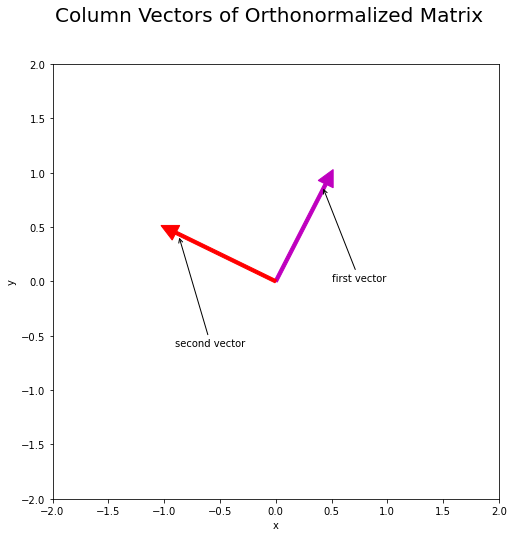

In [19]:
mtrort_col1 = mtr_ortho[:,0]      
mtrort_col2 = mtr_ortho[:,1]

fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Column Vectors of Orthonormalized Matrix", size=20)
ax.arrow(0, 0, *mtrort_col1, width=0.03, head_width=0.15, head_length=0.15, color='m')
ax.arrow(0, 0, *mtrort_col2, width=0.03, head_width=0.15, head_length=0.15, color='r')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set(ylabel='y', xlabel='x')
ax.annotate("first vector", xy=(0.42, 0.87), xytext=(0.5, 0), arrowprops=dict(arrowstyle="->"))
ax.annotate("second vector", xy=(-0.87, 0.42), xytext=(-0.9, -0.6), arrowprops=dict(arrowstyle="->"))


As can be seen from the visualization, the first column vector of orthonormalized matrix is in the direction of the first column vector of original matrix. However, the second vector is **orthogonal** to the first vector in the orthonormalized matrix visualization as opposed to the visualization of original matrix column vectors.

# Question 3

Let ${H}$ be a ${200 x 200}$ **Hilbert Matrix** whose entries are given by the equation,

${H_{i, j} = \frac{1}{i + j - 1}}$
for ${1 \leq i, j \leq 200}$. Form a ${200 x 200}$ matrix X by using the equation,

${X = 10^{-5}I + H}$

In [2]:
##Necessary code to create the desired matrix
x = sp.linalg.hilbert(200)           ##Hilbert matrix of size 200x200
y = (10**(-5))*np.identity(200)      ##Identity matrix of size 200x200 multiplied with scalar 10^(-5)
z = x + y                            ##Desired matrix
x

array([[1.        , 0.5       , 0.33333333, ..., 0.00505051, 0.00502513,
        0.005     ],
       [0.5       , 0.33333333, 0.25      , ..., 0.00502513, 0.005     ,
        0.00497512],
       [0.33333333, 0.25      , 0.2       , ..., 0.005     , 0.00497512,
        0.0049505 ],
       ...,
       [0.00505051, 0.00502513, 0.005     , ..., 0.00253165, 0.00252525,
        0.00251889],
       [0.00502513, 0.005     , 0.00497512, ..., 0.00252525, 0.00251889,
        0.00251256],
       [0.005     , 0.00497512, 0.0049505 , ..., 0.00251889, 0.00251256,
        0.00250627]])

# Q3 - Part (a)

Compute the ${QR}$-decomposition of ${X}$ by using the Gram-Schmidt algorithm that you implemented in Q1.

In [21]:
z_Q, z_R = QR_fact(z)      ##finding the Q and R
np.round(z_Q.T @ z_Q, 6)   ##actually showing if the Q is found correctly -> QTQ=I

array([[ 1.00e+00,  0.00e+00,  0.00e+00, ..., -0.00e+00,  0.00e+00,
        -0.00e+00],
       [ 0.00e+00,  1.00e+00,  0.00e+00, ...,  0.00e+00, -0.00e+00,
        -0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00, ...,  0.00e+00,  0.00e+00,
         0.00e+00],
       ...,
       [-0.00e+00,  0.00e+00,  0.00e+00, ...,  1.00e+00,  1.83e-04,
         1.83e-04],
       [ 0.00e+00, -0.00e+00,  0.00e+00, ...,  1.83e-04,  1.00e+00,
         1.83e-04],
       [-0.00e+00, -0.00e+00,  0.00e+00, ...,  1.83e-04,  1.83e-04,
         1.00e+00]])

# Q3 - Part (b)

Implement the **modified Gram-Schmidt** algorithm (See Algorithm 8.1 from Trefethen & Bau, 1997), and compute the ${QR}$-decomposition of ${X}$ again.

In [22]:
#Function of modified Gram-Schmidt Algorithm implemented by student with the help from the credited text book 
#and IALA Python Companion

def gramschmidt_mod(a):
    v = a
    q = []                                              
    r = np.zeros((len(a), len(a[0])))
    for i in range(len(a)):                             
        q_tilde = v[i]
        if np.sqrt(sum(q_tilde**2)) <= 1e-10:      ##testing if the vector is linearly independent/adding a new dimension
            return q
        else:
            r[i][i] = sp.linalg.norm(q_tilde)
            q.append(q_tilde/r[i][i])             ##normalization of the new vector by dividing to norm

            for j in range(i+1, len(a)):
                r[i][j] = q[i] @ v[j]   ##finding the already existing dimensions of this vector from the upcoming vectors -> R
                v[j] -= r[i][j] * q[i]  ##subtracting the already existing dimensions of this vector from the upcoming vectors
    return np.array(q).T, np.array(r).T           ##note that this is actually the transpose/inverse of the actual basis


In [24]:
z_Qmod, z_Rmod = np.array(gramschmidt_mod(z))    ##finding the Q and R
np.round((z_Qmod).T @ z_Qmod, 6)                 ##actually showing if the Q is found correctly -> QTQ=I

array([[ 1., -0., -0., ..., -0.,  0., -0.],
       [-0.,  1., -0., ..., -0., -0., -0.],
       [-0., -0.,  1., ..., -0., -0.,  0.],
       ...,
       [-0., -0., -0., ...,  1.,  0.,  0.],
       [ 0., -0., -0., ...,  0.,  1., -0.],
       [-0., -0.,  0., ...,  0., -0.,  1.]])

# Q3 - Part(c)

Calculate an error matrix ${E = I - Q^TQ}$ for each decomposition. Then, compare the performance of the algorithms by reporting the value of the **largest** entry (in absolute value) in these error matrices.

In [25]:
z_E = np.identity(200) - (z_Q).T@(z_Q)
z_Emod = np.identity(200) - (z_Qmod).T@(z_Qmod)
print("Absolute value of the largest error with first decomposition: " +str(abs(np.amax(z_E)))) 
print("Absolute value of the largest error with second (modified) decomposition: " +str(abs(np.amax(z_Emod))))

Absolute value of the largest error with first decomposition: 0.3913273098311851
Absolute value of the largest error with second (modified) decomposition: 7.771561172376096e-16


Since the value is smaller, the **modified version of Gram-Schmidt** has been shown to have better performance with these metric for this spesific matrix consturcted.

This is actually an anticipated result. While the actual algorithm subtracts the components of ${i^{th}}$ column vector in the direction of other column vectors from ${k = 1, ..., i-2, i-1}$ **cummulatively**, the modified algorithm does this process for each normalized vector before the ${i^{th}}$ **seperately** when they are first founded. This behaviour probably reduces the small errors coming from round-offs, leading to even better performance as size increases for modified algorithm.

# Question 4

Let ${f(x) = x^2 + 2e^x}$ defined in the range ${x ∈ (-2,2)}$. Plot the original function and
${0^{th}}$, ${1^{st}}$, ${2^{nd}}$, and ${3^{rd}}$ order Taylor Approximations in **this range**, at ${x_0 = 0.5}$.

Taylor Approximation of degree ${n}$ at a point denoted as ${x_0}$ is an approximation of the differentiable function in the close neighbourhood of this point. As the order of differentiation increases, ideally the approximation gets better. The formula is given by,

${\hat{f}(x) = f(x_0) + \sum \limits_{i=1} ^{n} \left(\frac{\left(\frac{d^{(n)}f(x_0)}{dx^{n}}\right)}{n!} (x - x_0)^{n}\right)}$

By this,

${0^{th}}$ Taylor Approximation of ${f(x)}$ at ${x_0 = 0.5}$ is ${\hat{f}(x) = f(0.5)}$

${1^{st}}$ Taylor Approximation of ${f(x)}$ at ${x_0 = 0.5}$ is ${\hat{f}(x) = f(0.5) + \frac{df(0.5)}{dx}(x-0.5)}$

${2^{nd}}$ Taylor Approximation of ${f(x)}$ at ${x_0 = 0.5}$ is ${\hat{f}(x) = f(0.5) + \frac{df(0.5)}{dx}(x-0.5) + \frac{(\frac{d^{2}f(0.5)}{dx^{2}})}{2!}(x-0.5)^2}$

${3^{rd}}$ Taylor Approximation of ${f(x)}$ at ${x_0 = 0.5}$ is ${\hat{f}(x) = f(0.5) + \frac{df(0.5)}{dx}(x-0.5) + \frac{(\frac{d^{2}f(0.5)}{dx^{2}})}{2!}(x-0.5)^2 + \frac{(\frac{d^{3}f(0.5)}{dx^{3}})}{3!}(x-0.5)^3}$

Several functions can be described with respect to these formulas,

In [3]:
##defining the function itself
def func(x):
    return x**2 + 2*np.exp(x)

##defining the zeroth Taylor Approximation recursively for nth order around x0 = 0.5
def taylor(x, ncurr):
    if ncurr==0:
        return func(0.5)
    else:
        return (derivative(func, x0=0.5, n=ncurr, dx = 1.0/2**16, order=5)/math.factorial(ncurr))*((x-0.5)**ncurr) + taylor(x, ncurr-1)


    
taylor = np.vectorize(taylor)   ##vectorizing the function so that it would not return scalar for ncurr=0


Text(0.8, -5, '*Function is better approached as order increases')

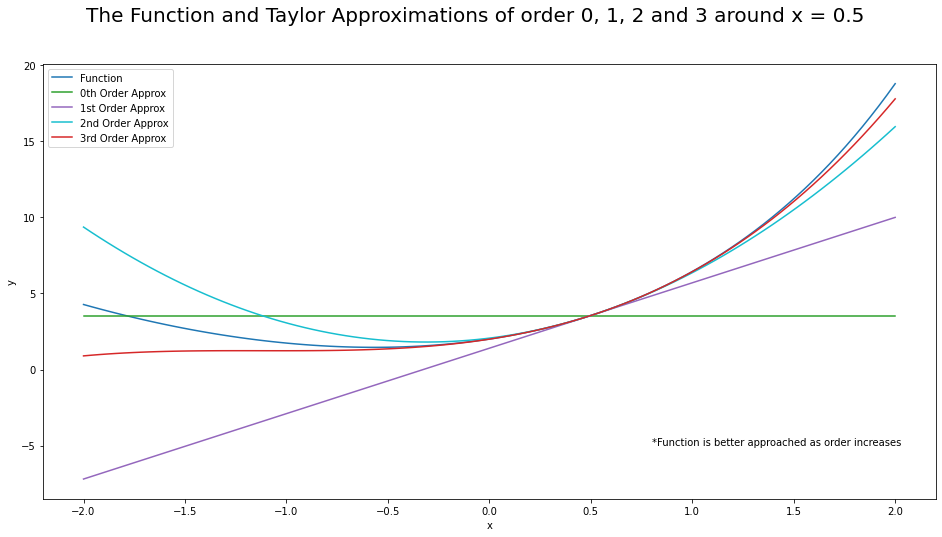

In [4]:
##Visualizations
x = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(figsize=(16,8))
fig.suptitle('The Function and Taylor Approximations of order 0, 1, 2 and 3 around x = 0.5', size=20)
plt.plot(x, func(x), label='Function')
plt.plot(x, taylor(x,0), 'tab:green', label='0th Order Approx')
plt.plot(x, taylor(x,1), 'tab:purple', label='1st Order Approx')
plt.plot(x, taylor(x,2), 'tab:cyan', label='2nd Order Approx')
plt.plot(x, taylor(x,3), 'tab:red', label='3rd Order Approx')
ax.set(ylabel='y', xlabel='x')
ax.legend(loc='upper left')
ax.annotate("*Function is better approached as order increases", xy=(0,0), xytext=(0.8, -5))

# Question 5

(Golub and van Loan, P.1.1.5) Suppose we have real ${n}$ by ${n}$ matrices ${C}$, ${D}$, ${E}$ and ${F}$. Show how to compute the real ${n}$ by ${n}$ matrices _A_ and _B_ with just **three** real ${n}$ by ${n}$ matrix multiplications so that,
                        
${(A + iB) = (C + iD) (E + iF)}$

By the distributive property of matrix multiplication,

${(C + iD) (E + iF) = (C + iD) (E) + (C + iD) (iF)}$

Again by the same property,

${(C + iD) (E + iF) = (C) (E) + (iD) (E) + (C) (iF) + (iD) (iF)}$

By using the distributive and associative properties of scalar multiplication over matrices and assuming ${i}$ to be a scalar where ${i^2 = -1}$,

${(A + iB) = (C + iD) (E + iF) = CE + i (DE + CF) - DF}$ is actually a matrix that can be expressed with 2 seperate matrices for the real and imaginary parts, 

Thus the fact that,

${A = CE - DF}$ and ${B = DE + CF}$ is proved.

However, this calculation requires **four** ${n}$ by ${n}$ real matrix multiplications while the solution space is limited with solutions including **there** ${n}$ by ${n}$ real matrix multiplications.

By the **HINT** provided in [Golub and van Loan edt. 3, P.1.1.6](https://twiki.cern.ch/twiki/pub/Main/AVFedotovHowToRootTDecompQRH/Golub_VanLoan.Matr_comp_3ed.pdf), 

${W = (C + D) * (E + F)}$ is a real ${n}$ by ${n}$ matrix that can be found by two ${n}$ by ${n}$ real matrix summations and one ${n}$ by ${n}$ real matrix multiplication. Where,

${W = CE + DE + CF + DF}$

Also,

${W = CE + B + DF}$

Hence if ${CE}$ and ${DF}$ is found by **two** ${n}$ by ${n}$ real matrix multiplication, note that the total number of **three** ${n}$ by ${n}$ real matrix multiplications have been reached.

${B = W - CE - DF}$ and ${A = CE - DF}$


# Question 6

(Boyd & Vandenberghe, 2018, Q2.4) The function ${\phi : \mathbb{R}^3 \to \mathbb{R}}$ satisfies,

${\phi(1, 1, 0) = -1}$,    ${\phi(-1, 1, 1) = 1}$,    ${\phi(1, -1, -1) = 1}$.

Choose one of the following and justify your choice: **must** be linear, **could** be linear, **cannot** be linear.

By definition, linear functions obey the rule of superposition and hence, can be expressed as an inner product with a function specific vector. For this particular problem, if ${\phi}$ is assumed to be linear, there should be a vector ${A = \begin{bmatrix} a_1 \ a_2 \ a_3 \end{bmatrix}}$ such that,

${\phi(1, 1, 0) = \begin{bmatrix} a_1 \ a_2 \ a_3 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ 0 \end{bmatrix} = -1}$

${\phi(-1, 1, 1) = \begin{bmatrix} a_1 \ a_2 \ a_3 \end{bmatrix} \begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix} = 1}$

${\phi(1, -1, -1) = \begin{bmatrix} a_1 \ a_2 \ a_3 \end{bmatrix} \begin{bmatrix} 1 \\ -1 \\ -1 \end{bmatrix} = 1}$

If put as a linear system,

${\begin{bmatrix} 1 & -1 & 0 \\ -1 & 1 & 1 \\ 1 & -1 & -1\end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix} = \begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix}}$

Though this system can be analyzed via proper linear algebraic methods, the scope of the material covered on the course does not include these methods yet. Hence, resorting to the more basic ways three equations can be written for three unknowns,

${1^{st}}$: ${a_1 + a_2 = -1}$   ,    ${2^{nd}}$: ${-a_1 + a_2 + a_3 = 1}$    ,   ${3^{rd}}$: ${a_1 - a_2 - a_3 = 1}$

The ${2^{nd}}$ and ${3^{rd}}$ equations considered together, does not have any solution for ${a_1, a_2, a_3}$. Hence, it is a contradiction. It can be concluded that the function ${\phi}$ **cannot** be linear.

## References

[Gram-Schmidt vs. Modified Gram-Schmidt](https://laurenthoeltgen.name/post/gram-schmidt/)

[MatPlotLib Documentation](https://matplotlib.org/stable/index.html)